#FUNCIONES DE DISTRIBUCIÓN DE PROBABILIDADES

##DISTRIBUCIÓN UNIFORME

In [12]:
#importación de librerías
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
a = 1
b = 100
n = 1000000
data = np.random.uniform(a,b,n)

(array([100619., 100053., 100291.,  99736., 100123.,  99940., 100056.,
         99289., 100141.,  99752.]),
 array([ 1.00006094, 10.90005268, 20.80004442, 30.70003616, 40.6000279 ,
        50.50001964, 60.40001138, 70.30000313, 80.19999487, 90.09998661,
        99.99997835]),
 <a list of 10 Patch objects>)

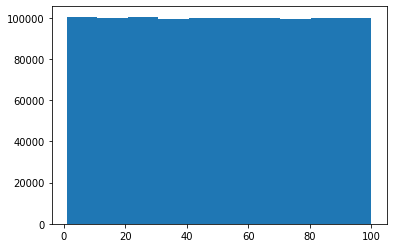

In [3]:
% matplotlib inline
plt.hist(data)
# conforme se va aumentando el valor n, va pareciendo más uniforme

#DISTRIBUCIÓN NORMAL

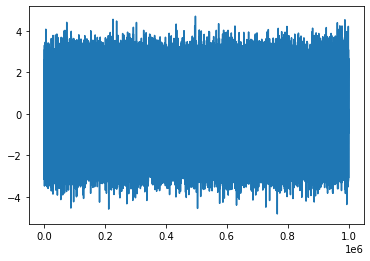

In [4]:
data_normal = np.random.randn(1000000) #distribución N(0,1)
x = range(1,1000001)
plt.plot(x,data_normal)

(array([5.30000e+01, 1.66100e+03, 2.24650e+04, 1.28966e+05, 3.19380e+05,
        3.39165e+05, 1.55143e+05, 3.05180e+04, 2.55800e+03, 9.10000e+01]),
 array([-4.83095829, -3.87838134, -2.92580439, -1.97322744, -1.02065049,
        -0.06807355,  0.8845034 ,  1.83708035,  2.7896573 ,  3.74223425,
         4.69481119]),
 <a list of 10 Patch objects>)

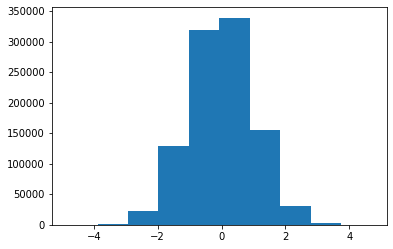

In [5]:
plt.hist(data_normal)

(array([1.0000e+00, 0.0000e+00, 3.0000e+00, 1.0000e+00, 2.0000e+00,
        4.0000e+00, 6.0000e+00, 5.0000e+00, 1.5000e+01, 1.6000e+01,
        2.1000e+01, 2.4000e+01, 6.1000e+01, 5.5000e+01, 8.2000e+01,
        1.3900e+02, 2.0600e+02, 2.8100e+02, 3.3900e+02, 4.5300e+02,
        5.9300e+02, 7.4100e+02, 9.9300e+02, 1.3670e+03, 1.7540e+03,
        2.1180e+03, 2.7000e+03, 3.2560e+03, 4.0640e+03, 4.8790e+03,
        6.0240e+03, 6.9740e+03, 8.3960e+03, 9.8640e+03, 1.1229e+04,
        1.3182e+04, 1.5311e+04, 1.7099e+04, 1.9336e+04, 2.1551e+04,
        2.3716e+04, 2.5816e+04, 2.7950e+04, 2.9898e+04, 3.1851e+04,
        3.4076e+04, 3.5296e+04, 3.6113e+04, 3.6939e+04, 3.7725e+04,
        3.7879e+04, 3.7879e+04, 3.7697e+04, 3.7049e+04, 3.5528e+04,
        3.3929e+04, 3.2638e+04, 3.0885e+04, 2.8827e+04, 2.6854e+04,
        2.4651e+04, 2.2374e+04, 2.0298e+04, 1.8244e+04, 1.6064e+04,
        1.4093e+04, 1.2255e+04, 1.0465e+04, 9.0440e+03, 7.6550e+03,
        6.4520e+03, 5.2790e+03, 4.4490e+03, 3.65

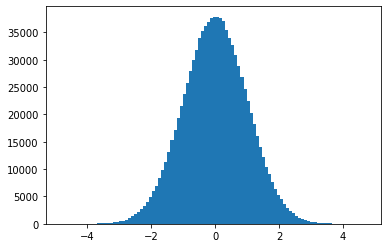

In [6]:
plt.hist(data_normal, bins=100)

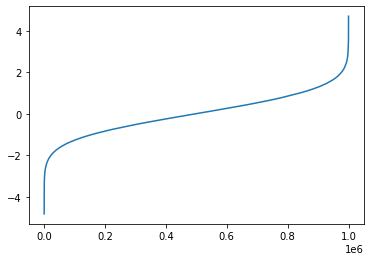

In [7]:
plt.plot(x,sorted(data_normal)) #con sorted se pueden ordenar los datos

(array([1.00000e+02, 2.70600e+03, 3.34890e+04, 1.68121e+05, 3.52570e+05,
        3.10188e+05, 1.14040e+05, 1.76110e+04, 1.15100e+03, 2.40000e+01]),
 array([-6.26857824, -3.84301018, -1.41744213,  1.00812593,  3.43369399,
         5.85926205,  8.2848301 , 10.71039816, 13.13596622, 15.56153427,
        17.98710233]),
 <a list of 10 Patch objects>)

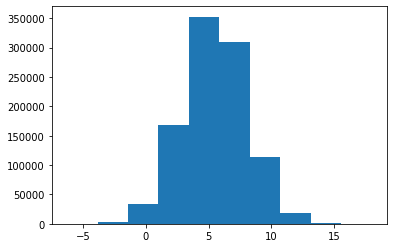

In [8]:
#Para crear una distribución normal pero no centrada en 0 ni con desviación típica de 1
mu = 5.5
sd = 2.5
data_normal_mu_sd = sd * np.random.randn(1000000) + mu
plt.hist(data_normal_mu_sd)

Esta formulación procede de que para normalizar una distribución normal a N(0,1) se realiza haciendo Z = (X - mu) / sd --> N(0,1), así X = mu + Z * sd. Esto se llama TEOREMA CENTRAL DEL LÍMITE

In [9]:
data_arrays = np.random.randn(2,4) #dos arrays de 4 valores cada uno
data_arrays

array([[-1.16773215,  1.06714359, -0.41451216,  1.04627649],
       [-1.01861607, -0.24965726, -2.39425588,  1.48537675]])

# LA SIMULACIÓN DE MONTECARLO
La simulación de Montecarlo consiste en, imaginando un círculo de radio r inscrito en un cuadrado, si obtenemos la probabilidad de caer en el círculo respecto a la de caer en el cuadrado, sería equivalente a la proporción de áreas.
De esa forma, $P = (\pi*r^2)/(2r)^2 = \pi/4$	
Es por ello, que con estas probabilidades se puede inferir el valor de $\pi$.


##PROCEDIMIENTO
Generamos dos números aleatorios (x e y) entre 0 y 1. En lugar de hacer el experimento con todo el círculo, esto significaría que lo hacemos para el primer cuadrante.
Calculamos la ecuación del círculo ($x^2+y^2$), y de esa manera:
* si el valor es inferior a 1, estamos dentro del círculo
* si el valor es superior a 1, estamos fuera del círculo

Calculamos el número total de veces que se cae dentro del círculo respecto a los casos totales, y con dicha probabilidad se puede aproximar el valor de $\pi$.
Repitiendo el procedimiento un número suficiente de veces, se pueden obtener diferentes aproximaciónes de $\pi$.
De todas esas veces, calculamos un promedio para dar un valor final de $\pi$

In [10]:
def pi_montecarlo(iteraciones, n): #iteraciones es la vez que hacemos el cálculo de la probabilidad, y n el tamaño de cada muestra
  aproximaciones_de_pi = []
  for iter in range(iteraciones):
    x = np.random.uniform(0,1,n)
    y = np.random.uniform(0,1,n)
    results = []
    for i in range(len(x)):
      if(x[i]**2+y[i]**2 < 1):
        results.append(1)
      else:
        results.append(0)  
    P = np.sum(results) / n
    pi = 4 * P
    aproximaciones_de_pi.append(pi)
  pi = np.mean(aproximaciones_de_pi)
  return pi
pi_montecarlo(10000,200)

3.14394

El valor de PI calculado es 3.1406700670067322
El error obtenido es -0.0009225865830608804


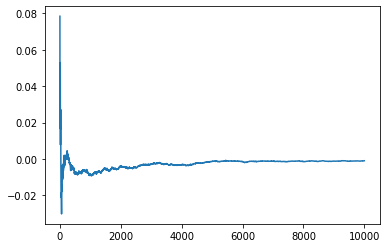

In [11]:
#A continuación se hace una prueba para ver si converge la media de valores hacia el valor Pi
pi_teorico = 3.14159265358979323846264338327950288419716939937510

# Creo una función como la anterior pero que en lugar de devolver pi como la media, devuelva todo el array de resultados
def pi_montecarlo_array(iteraciones, n): #iteraciones es la vez que hacemos el cálculo de la probabilidad, y n el tamaño de cada muestra
  aproximaciones_de_pi = []
  for iter in range(iteraciones):
    x = np.random.uniform(0,1,n)
    y = np.random.uniform(0,1,n)
    results = []
    for i in range(len(x)):
      if(x[i]**2+y[i]**2 < 1):
        results.append(1)
      else:
        results.append(0)  
    P = np.sum(results) / n
    pi = 4 * P
    aproximaciones_de_pi.append(pi)
  return aproximaciones_de_pi

array = pi_montecarlo_array(10000,200)

#En un array se guardará en cada posición, la media de ese valor con todos los anteriores
array_de_medias = []
for i in range(len(array)): 
  if i == 0:
    array_de_medias.append(array[i])
  else:
    array_de_medias.append((array_de_medias[i-1] * (i-1)+ array[i]) / i)

error = [x - pi_teorico for x in array_de_medias]

pi_calculado = array_de_medias[-1]
error_calculado = error[-1]
print('El valor de PI calculado es %s' % pi_calculado)
print('El error obtenido es %s' % error_calculado)

plt.plot(error)

## DUMMY DATASETS

In [16]:
n = 1000000
data = pd.DataFrame(
    {
        'A': np.random.randn(n),
        'B': 1.5 + 2.5 * np.random.randn(n),
        'C': np.random.uniform(5,32,n)
    }
)
data.describe()

,A,B,C
count,1000000.000000,1000000.000000,1000000.000000
mean,0.000289,1.495290,18.489021
std,1.000011,2.498708,7.793157
min,-4.986507,-10.823648,5.000004
25%,-0.674355,-0.190308,11.738799
50%,0.000663,1.495080,18.477068
75%,0.675579,3.180864,25.243849
max,4.862789,13.720791,31.999952


(array([3.30000e+01, 1.26200e+03, 1.96650e+04, 1.26762e+05, 3.27391e+05,
        3.46723e+05, 1.50037e+05, 2.62590e+04, 1.82300e+03, 4.50000e+01]),
 array([-4.98650721, -4.00157762, -3.01664803, -2.03171845, -1.04678886,
        -0.06185927,  0.92307031,  1.9079999 ,  2.89292949,  3.87785908,
         4.86278866]),
 <a list of 10 Patch objects>)

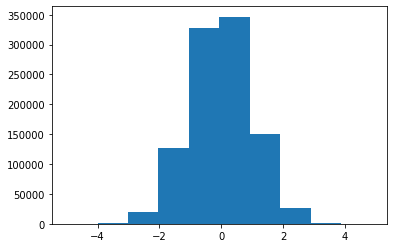

In [17]:
plt.hist(data['A'])

(array([4.30000e+01, 1.45600e+03, 2.20080e+04, 1.35197e+05, 3.33842e+05,
        3.39861e+05, 1.41916e+05, 2.40120e+04, 1.61400e+03, 5.10000e+01]),
 array([-10.8236476 ,  -8.36920375,  -5.9147599 ,  -3.46031606,
         -1.00587221,   1.44857164,   3.90301548,   6.35745933,
          8.81190317,  11.26634702,  13.72079087]),
 <a list of 10 Patch objects>)

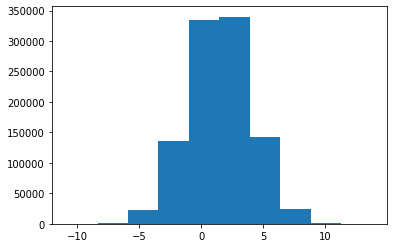

In [18]:
plt.hist(data['B'])

(array([100031.,  99999., 100315., 100482.,  99949., 100027.,  99608.,
         99894.,  99993.,  99702.]),
 array([ 5.00000355,  7.69999837, 10.3999932 , 13.09998802, 15.79998285,
        18.49997767, 21.19997249, 23.89996732, 26.59996214, 29.29995697,
        31.99995179]),
 <a list of 10 Patch objects>)

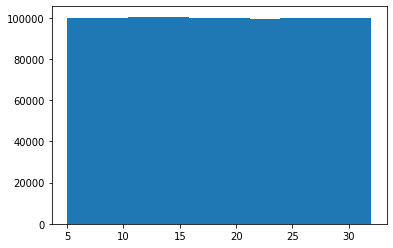

In [19]:
plt.hist(data['C'])

In [20]:
#carga de datos
url = 'https://raw.githubusercontent.com/javilledo/python-ml-course/master/datasets/customer-churn-model/Customer%20Churn%20Model.txt'
data = pd.read_csv(url)
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [22]:
column_names = data.columns.values.tolist()
column_names

['State',
 'Account Length',
 'Area Code',
 'Phone',
 "Int'l Plan",
 'VMail Plan',
 'VMail Message',
 'Day Mins',
 'Day Calls',
 'Day Charge',
 'Eve Mins',
 'Eve Calls',
 'Eve Charge',
 'Night Mins',
 'Night Calls',
 'Night Charge',
 'Intl Mins',
 'Intl Calls',
 'Intl Charge',
 'CustServ Calls',
 'Churn?']

In [24]:
a = len(column_names)
new_data = pd.DataFrame(
    {
        'Column Name': column_names,
        'A': np.random.randn(a),
        'B': np.random.uniform(0,1,a)
    }, index = range(42, 42 + a)
)
new_data

,Column Name,A,B
42,State,-0.774497,0.178209
43,Account Length,-0.944238,0.125341
44,Area Code,-0.291807,0.266278
45,Phone,-0.135634,0.322264
46,Int'l Plan,-2.970215,0.679942
47,VMail Plan,-1.307239,0.155547
48,VMail Message,-0.614640,0.159458
49,Day Mins,0.678559,0.882484
50,Day Calls,-0.083418,0.859834
51,Day Charge,-1.719150,0.184229
